### Figure 7

In [1]:
import sys
import os

# Get the absolute path to the project root (one directory up from notebooks/)
root_path = os.path.abspath("..")
sys.path.append(root_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src import figure_Tools as fT
from src import dist_fit

# needed datasets
df_edges = pd.read_pickle('../Data/Edge_data.pkl')

### Figure 7a

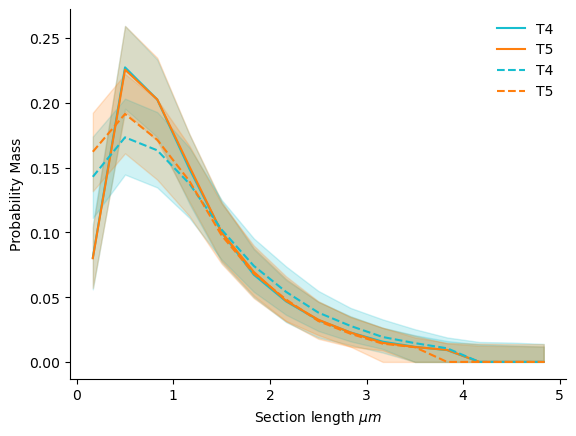

In [2]:
fig, ax = plt.subplots()

df = df_edges.loc[df_edges.isExternal == True]
fT.repeated_measures_PMF_df(ax, df, 'Length','Type',fT.Types, fT.Type_colours,x0 = 0,x1 = 5, num_bins = 15, fill_kwargs = {'alpha':0.2})

df = df_edges.loc[df_edges.isExternal == False]
fT.repeated_measures_PMF_df(ax, df, 'Length','Type',fT.Types, fT.Type_colours,x0 = 0,x1 = 5, num_bins = 15, fill_kwargs = {'alpha':0.2}, line_kwargs = {'ls':'--'})

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Probability Mass')
ax.set_xlabel('Section length $\mu m$')
ax.legend(frameon = False)

### Figure 7b

Text(0.5, 0, 'Variance Scaled Section Length')

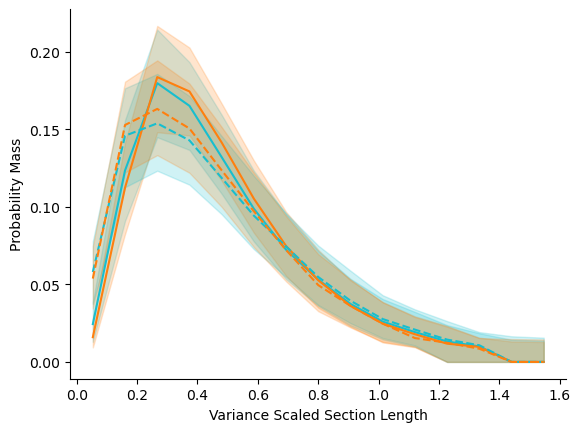

In [3]:
fig, ax = plt.subplots()

df = df_edges.loc[df_edges.isExternal == True]
fT.repeated_measures_PMF_df(ax, df, 'Length_varScaled','Type',fT.Types, fT.Type_colours,x0 = 0,x1 = 1.6, num_bins = 15, fill_kwargs = {'alpha':0.2})

df = df_edges.loc[df_edges.isExternal == False]
fT.repeated_measures_PMF_df(ax, df, 'Length_varScaled','Type',fT.Types, fT.Type_colours,x0 = 0,x1 = 1.6, num_bins = 15, fill_kwargs = {'alpha':0.2}, line_kwargs = {'ls':'--'})

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Probability Mass')
ax.set_xlabel('Variance Scaled Section Length')

### Exploratory Distribution fitting analysis

#### Internal, raw lengths

In [2]:
dist_fits = dist_fit.DistributionFitter(
    df=df_edges,
    DV_col="Length",
    isExternal=False,
    xmin=0,
    xmax=5,
    n_bins=50,
    progress=False,
)
# fit all distributions
dist_fits.fit_distributions();

# view best fit summary (notice it is always the same distribution)
dist_fits.bestFit_summary()


,Type,Subtype,Best_distribution,BIC,Log_likelihood,Parameters
0,T4,a,weibull_min,-8.972219e+05,-76133.433400,"(1.2739690482479487, 0.03987349928761895, 1.34..."
1,T4,b,weibull_min,-8.052384e+05,-69965.540307,"(1.2814788678832967, 0.03643906844072459, 1.32..."
2,T4,c,weibull_min,-1.000039e+06,-81102.046082,"(1.2894114947907058, 0.0354688083567585, 1.320..."
3,T4,d,weibull_min,-8.838385e+05,-73136.072231,"(1.3148663065341821, 0.02271177582035238, 1.36..."
4,T5,a,weibull_min,-7.383939e+05,-59120.489663,"(1.2656048538626186, 0.02840311892017497, 1.23..."
5,T5,b,weibull_min,-7.227090e+05,-58152.874918,"(1.2828504720208085, 0.031215869278921022, 1.2..."
6,T5,c,weibull_min,-8.956160e+05,-65712.065701,"(1.2539122672528595, 0.05128192505499704, 1.18..."
7,T5,d,weibull_min,-7.877337e+05,-60130.109112,"(1.2503190655550402, 0.04765661084171718, 1.20..."


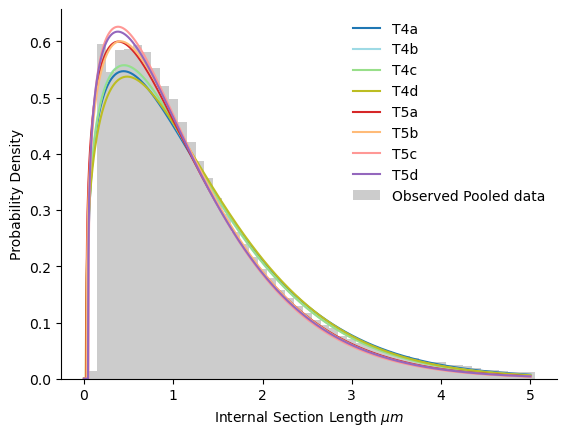

In [3]:
# plot

fig, ax = plt.subplots()

dist_fits.plot_density(ax,'weibull_min')

ax.legend(frameon = False)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Internal Section Length $\mu m$")
ax.set_ylabel("Probability Density");

External, raw lengths

In [6]:
dist_fits = dist_fit.DistributionFitter(
    df=df_edges,
    DV_col="Length",
    isExternal=True,
    xmin=0,
    xmax=5,
    n_bins=50,
    progress=False,
)
# fit all distributions
dist_fits.fit_distributions();

# view best fit summary (notice it is always the same distribution)
dist_fits.bestFit_summary()

,Type,Subtype,Best_distribution,BIC,Log_likelihood,Parameters
0,T4,a,lognorm,-1.007156e+06,-78477.252321,"(0.664899012520635, -0.08789334769841145, 1.08..."
1,T4,b,lognorm,-9.148831e+05,-70170.310521,"(0.6453558356077438, -0.10050954072174233, 1.0..."
2,T4,c,lognorm,-1.093354e+06,-82077.761919,"(0.6583752913897322, -0.0830882679348654, 1.05..."
3,T4,d,lognorm,-9.353165e+05,-73450.890467,"(0.6661847058573769, -0.07816968735979182, 1.0..."
4,T5,a,lognorm,-8.675305e+05,-66299.409115,"(0.6521828644962487, -0.08891424168326738, 1.0..."
5,T5,b,lognorm,-8.778820e+05,-63088.812874,"(0.6427754049539036, -0.09604781503503741, 1.0..."
6,T5,c,lognorm,-9.743118e+05,-72144.435282,"(0.6563033750498632, -0.07302289920855033, 1.0..."
7,T5,d,lognorm,-8.921177e+05,-65989.412072,"(0.6532496527125287, -0.08154229827125246, 1.0..."


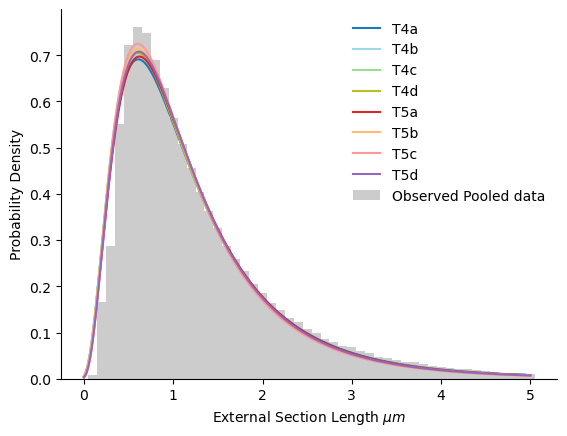

In [7]:
fig, ax = plt.subplots()

dist_fits.plot_density(ax,'lognorm')

ax.legend(frameon = False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("External Section Length $\mu m$")
ax.set_ylabel("Probability Density");

Internal scaled lengths

In [2]:
dist_fits = dist_fit.DistributionFitter(
    df=df_edges,
    DV_col="Length_varScaled",
    isExternal=False,
    xmin=0,
    xmax=1.6,
    n_bins=50,
    progress=False,
)
# fit all distributions
dist_fits.fit_distributions();

# view best fit summary (notice it is always the same distribution)
dist_fits.bestFit_summary()

,Type,Subtype,Best_distribution,BIC,Log_likelihood,Parameters
0,T4,a,gamma,-759600.314186,-13016.885009,"(2.0116918174575407, 0.014008338661651798, 0.2..."
1,T4,b,gamma,-701756.930691,-11649.246599,"(2.041981049596707, 0.012986320275951792, 0.23..."
2,T4,c,gamma,-878572.440298,-9084.282746,"(2.0481869635629613, 0.015649716431477095, 0.2..."
3,T4,d,gamma,-757755.800515,-9795.609780,"(2.172111141891855, 0.006901525977601046, 0.21..."
4,T5,a,gamma,-642515.825156,-9616.650920,"(2.085542215976765, 0.015876100913709525, 0.22..."
5,T5,b,gamma,-639053.787711,-8461.836668,"(2.1571381175584907, 0.012813784104916072, 0.2..."
6,T5,c,gamma,-786024.255258,-3313.312779,"(2.137317729090263, 0.01935184441856699, 0.201..."
7,T5,d,gamma,-698052.001056,-4650.981752,"(2.2121702246029247, 0.01374408008507184, 0.20..."


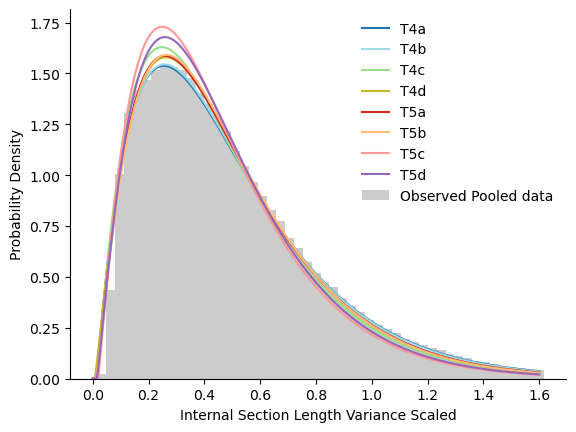

In [9]:
fig, ax = plt.subplots()

dist_fits.plot_density(ax,'gamma')

ax.legend(frameon = False)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Internal Section Length Variance Scaled")
ax.set_ylabel("Probability Density");

external scaled lengths

In [10]:
dist_fits = dist_fit.DistributionFitter(
    df=df_edges,
    DV_col="Length_varScaled",
    isExternal=True,
    xmin=0,
    xmax=1.6,
    n_bins=50,
    progress=False,
)
# fit all distributions
dist_fits.fit_distributions();

# view best fit summary (notice it is always the same distribution)
dist_fits.bestFit_summary()

,Type,Subtype,Best_distribution,BIC,Log_likelihood,Parameters
0,T4,a,lognorm,-869976.851517,-11127.133998,"(0.5374172182933363, -0.07181423037310079, 0.4..."
1,T4,b,lognorm,-809802.767005,-7781.065314,"(0.52727082649927, -0.07359817131952447, 0.484..."
2,T4,c,lognorm,-990340.548368,-8960.218556,"(0.5185348829945162, -0.07775340892031916, 0.4..."
3,T4,d,lognorm,-833628.366767,-11674.684193,"(0.5196780037370311, -0.0840776487665695, 0.51..."
4,T5,a,lognorm,-766577.373756,-8174.645148,"(0.5034212561724883, -0.07605517862134112, 0.5..."
5,T5,b,lognorm,-766620.045880,-5645.732145,"(0.5073006212688795, -0.06949755364136495, 0.4..."
6,T5,c,lognorm,-872693.982824,-5656.048996,"(0.5036925206303916, -0.0711630848270517, 0.49..."
7,T5,d,lognorm,-778041.136883,-8085.987707,"(0.49321189553919664, -0.08407904752570586, 0...."


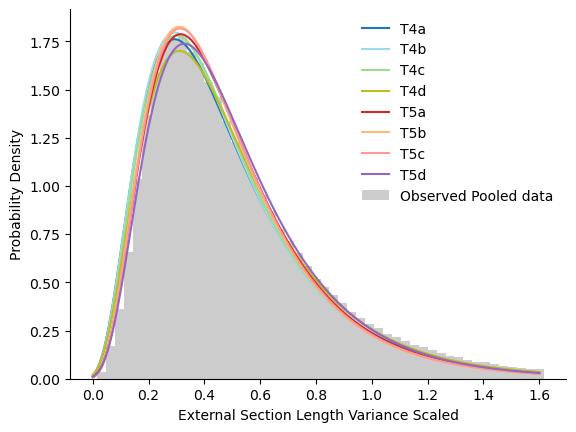

In [11]:
fig, ax = plt.subplots()

dist_fits.plot_density(ax,'lognorm')

ax.legend(frameon = False)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("External Section Length Variance Scaled")
ax.set_ylabel("Probability Density");